## ***DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP -- June'21***

### **GRIP : THE SPARKS FOUNDATION**

**AUTHOR : PRITY KUMARI**

## #TASK_3 : Exploratory Data Analysis

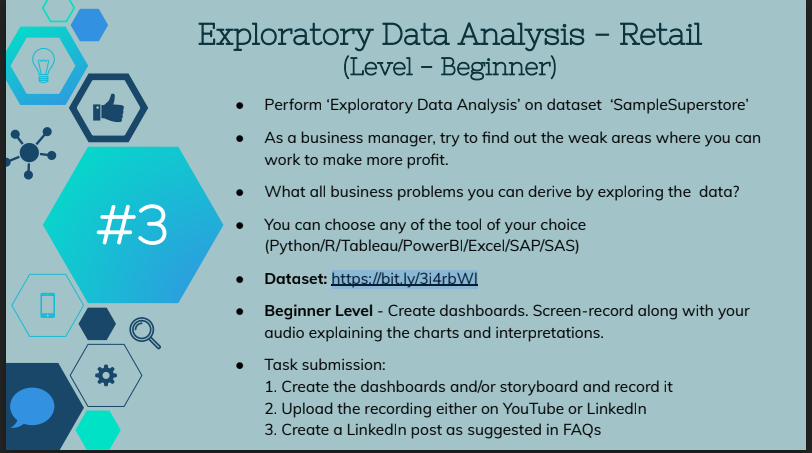

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Getting the data
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
sample = pd.read_csv('SampleSuperstore.csv')

In [ ]:
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
sample.shape

(9994, 13)

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
sample.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


**There are 4 types of ship mode and 3 segments of people that we have to examine.**

### **DATA CLEANING -- Let's Check Missing values**

In [ ]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

*No Missing Values can be seen.*

In [ ]:
sample.duplicated().sum()

17

*17 Duplicate values found, so we have to drop it.*

### **Dropping the Duplicate Values**

In [ ]:
sample.drop_duplicates(inplace = True)

In [ ]:
sample.shape

(9977, 13)

17 Duplicate rows are removed hence numbers of rows decreased from 9994 to 9977

In [ ]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
sample['Postal Code'].corr(sample['Profit'])

-0.02989230073313605

### ***We can drop irrelevant columns after checking the unique value in sample.***
for example -- There is only one unique value in country column. Also postal code column has very low correlation with profit column. 

In [ ]:
sample = sample.drop(columns=['Postal Code','Country'],axis=1)

In [ ]:
sample

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### **DATA VISUALIZATION**

In [ ]:
#To find correlation between different numerical variables
sample.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


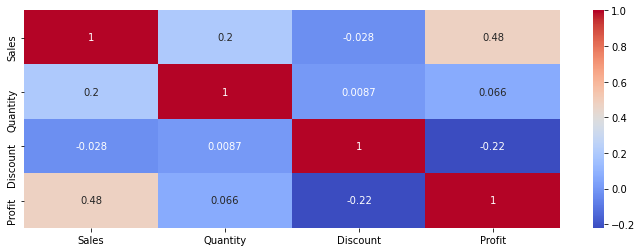

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(sample.corr(),annot=True,cmap='coolwarm')
plt.show()

### *We can see that Correlation of Profit with sales are moderate,where Discount is negatively correlated and have very low correlation with Quantity.*

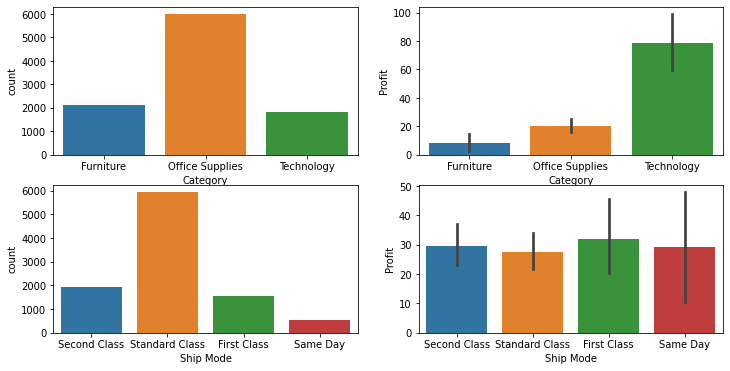

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
plt.subplot(221); sns.countplot('Category',data=sample)        
plt.subplot(222); sns.barplot(x='Category',y='Profit',data=sample)
plt.subplot(223); sns.countplot('Ship Mode',data=sample)
plt.subplot(224); sns.barplot(x='Ship Mode',y='Profit',data=sample)

### *We plotted **Categories** and **Ship Mode** based on its number of occurences and its contribution to net profit.* 

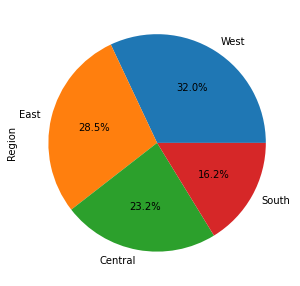

In [ ]:
plt.figure(figsize=(10,5))
sample['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show>

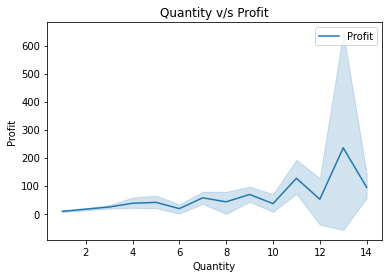

In [ ]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data= sample)
plt.title('Quantity v/s Profit')
plt.legend()
plt.show

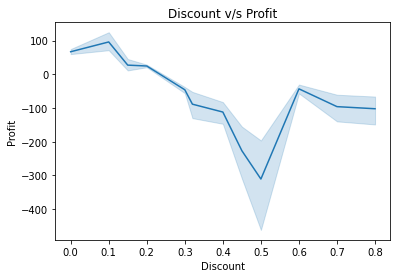

In [ ]:
sns.lineplot(x='Discount',y='Profit',data=sample)
plt.title('Discount v/s Profit')
plt.show()

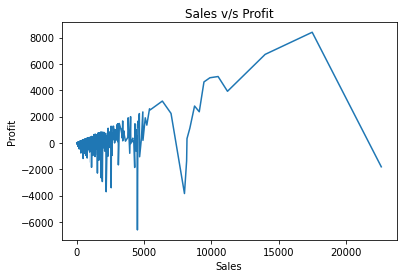

In [ ]:
sns.lineplot(x='Sales',y='Profit',data=sample)
plt.title('Sales v/s Profit')
plt.show()

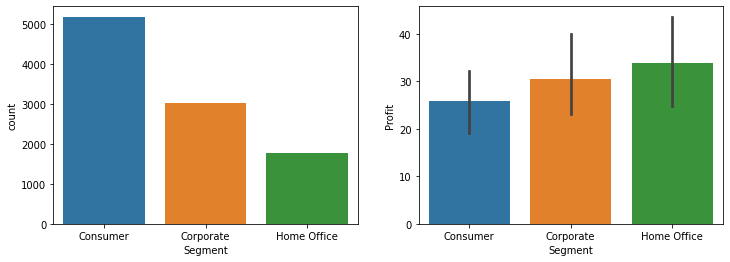

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)  
sns.countplot(x='Segment',data =sample)        
plt.subplot(122)    
sns.barplot(x='Segment',y='Profit',data=sample)

### **Even though the no.of Counsumers are large in large, they make less profit compared to Home office segment.**

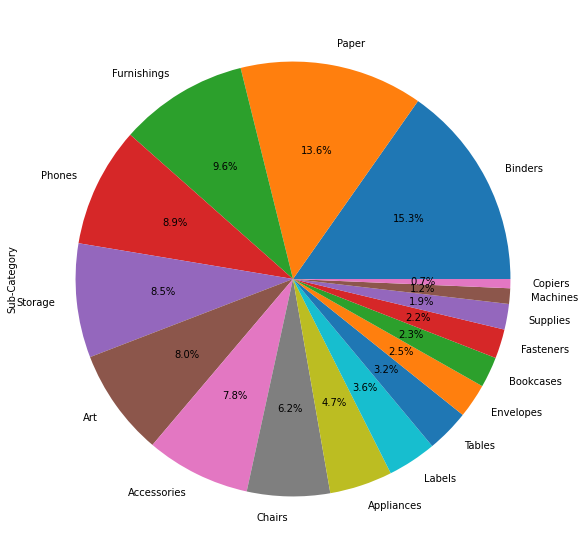

In [ ]:
plt.figure(figsize=(15,10))
sample['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

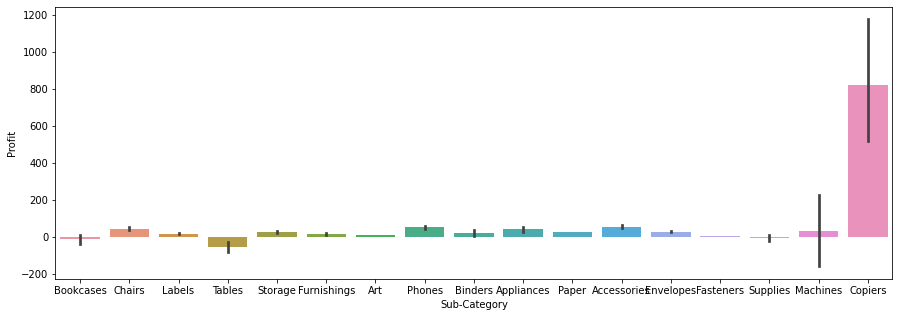

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Sub-Category',y='Profit',data=sample)

**Most number of Profits are due to Copiers(Sub-Category)**

In [ ]:
sample.State.nunique()

49

In [ ]:
sample.City.nunique()

531

In [ ]:
sample['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

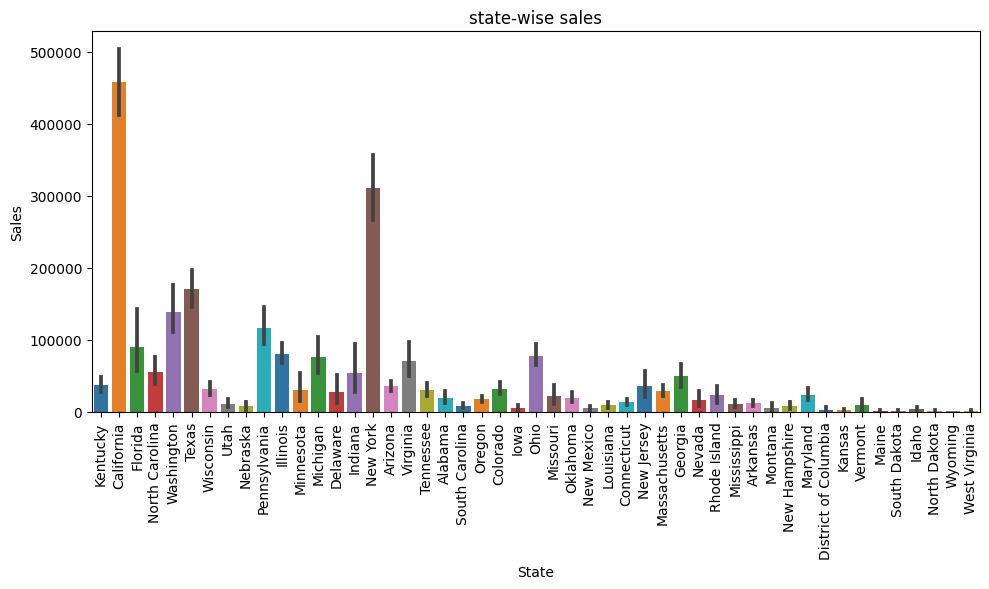

In [ ]:
#state-wise sales
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x='State',y='Sales',data=sample,estimator=np.sum,palette='tab10')
plt.title('state-wise sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

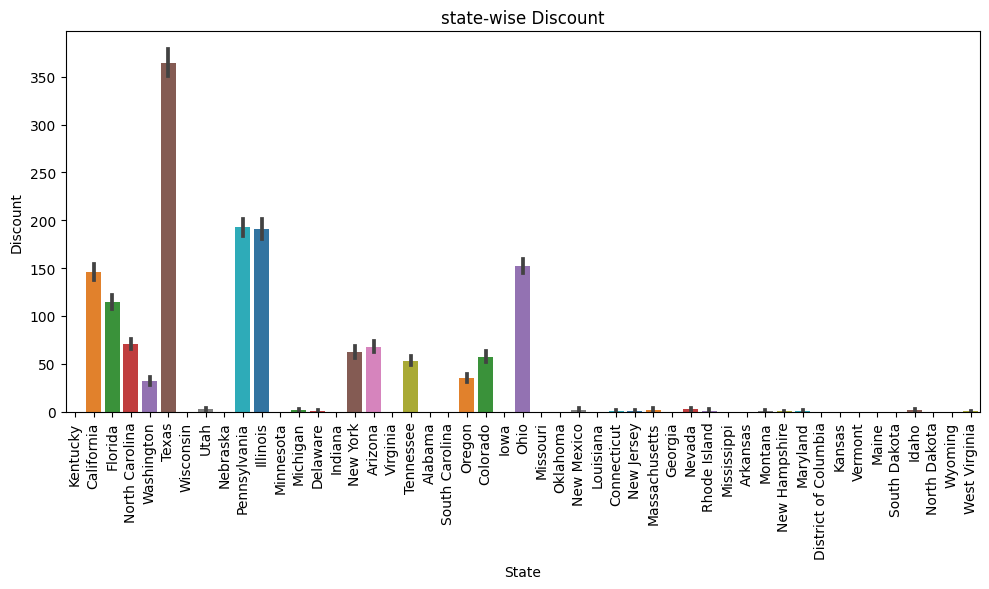

In [ ]:
#state-wise Discount
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x='State',y='Discount',data=sample,estimator=np.sum,palette='tab10')
plt.title('state-wise Discount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


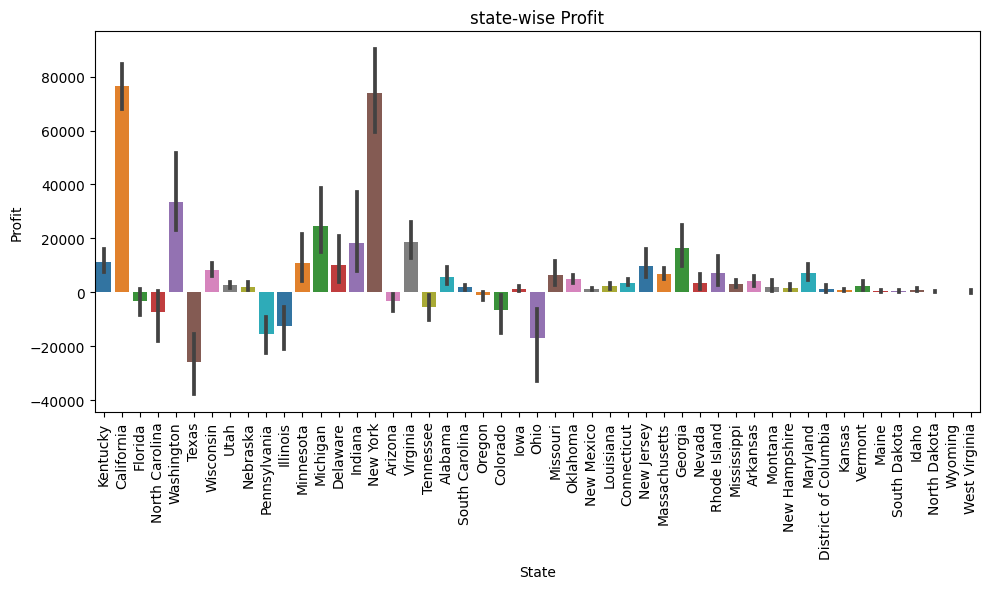

In [ ]:
#state-wise Profit
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x='State',y='Profit',data=sample,estimator=np.sum,palette='tab10')
plt.title('state-wise Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


1. Texas has maximum discounts but low in number of sales thus ends up with huge loss
2. New york and California has largest number of sales and making good profits with small discounts
3. states like Maine, Vermont offers no discount and ultimately have very very low profits. 

In [ ]:
city=sample.groupby(by='City').sum().sort_values('Profit')
city.head()

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,109061.4610,1978,175.30,-13843.2106
Houston,64441.2564,1460,142.74,-10175.1755
San Antonio,21843.5280,247,22.60,-7299.0502
Lancaster,9891.4640,171,14.50,-7239.0684
Chicago,48535.9770,1129,119.70,-6648.3318


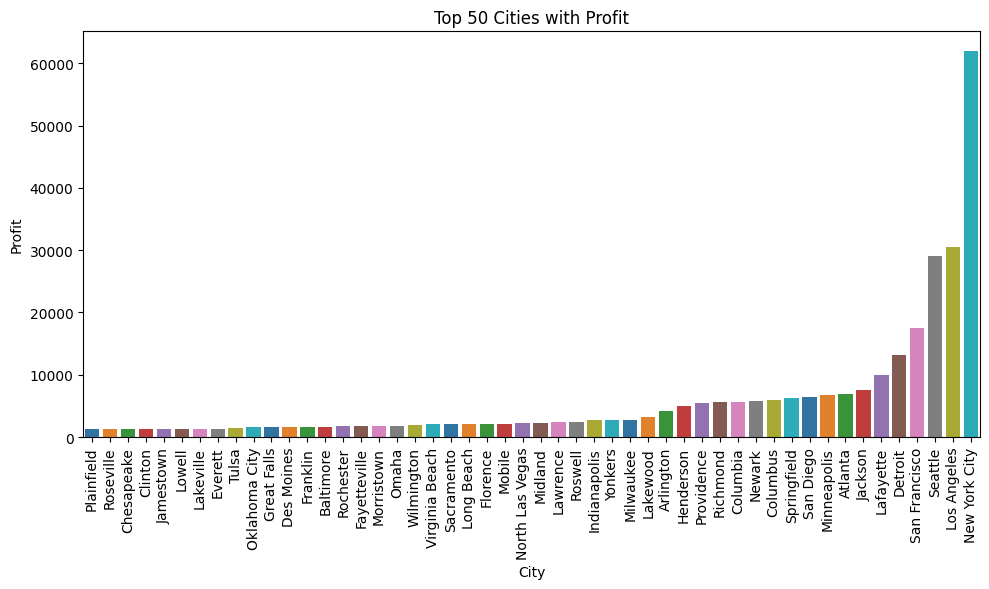

In [ ]:
#City-wise analysis
Profit=city.reset_index().tail(50)
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x='City',y='Profit',data=Profit,estimator=np.sum,palette='tab10')
plt.title('Top 50 Cities with Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# **Observations**:
1. Fasteners,Supplies,Art are the areas of Sub-Category we need to work on because of almost zero profits.
2. Sales and Profit are more in Standard class.
3. Highest no.of buyers are from New-york and California also New-york got maximum Profit 

**Conclusions:** The weak areas where one can work to make more Profits are:
*   The increase in sales in furniture will not increase Profit, but increasing the Price value will, and maintaining optimum sales in every region is must for better profit.
*   In the Sub-categories, we are facing huge loss on tables,so that should be minimized.
*   The percentage of discount offered shoul not be more than 25%,otherwise loss will be faced.
*   Few sales like North dakota, Wyorning and West virginia have less or no sales at all so we also need to focus on these states.



## **Thank you!**